# To predict diabetes using PIMA diabetes data

## Importing libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [12]:
data = pd.read_csv("diabetes.csv")

In [13]:
data.shape

(768, 9)

In [14]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Checking for any NULL values

In [60]:
# check if any null value is present
data.isnull().values.any()

False

In [61]:
print(data.isnull().sum())
print("total number of rows : {0}".format(len(data)))

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
total number of rows : 768


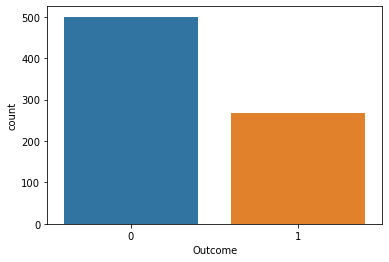

In [62]:
sns.countplot(data.Outcome,data=data)

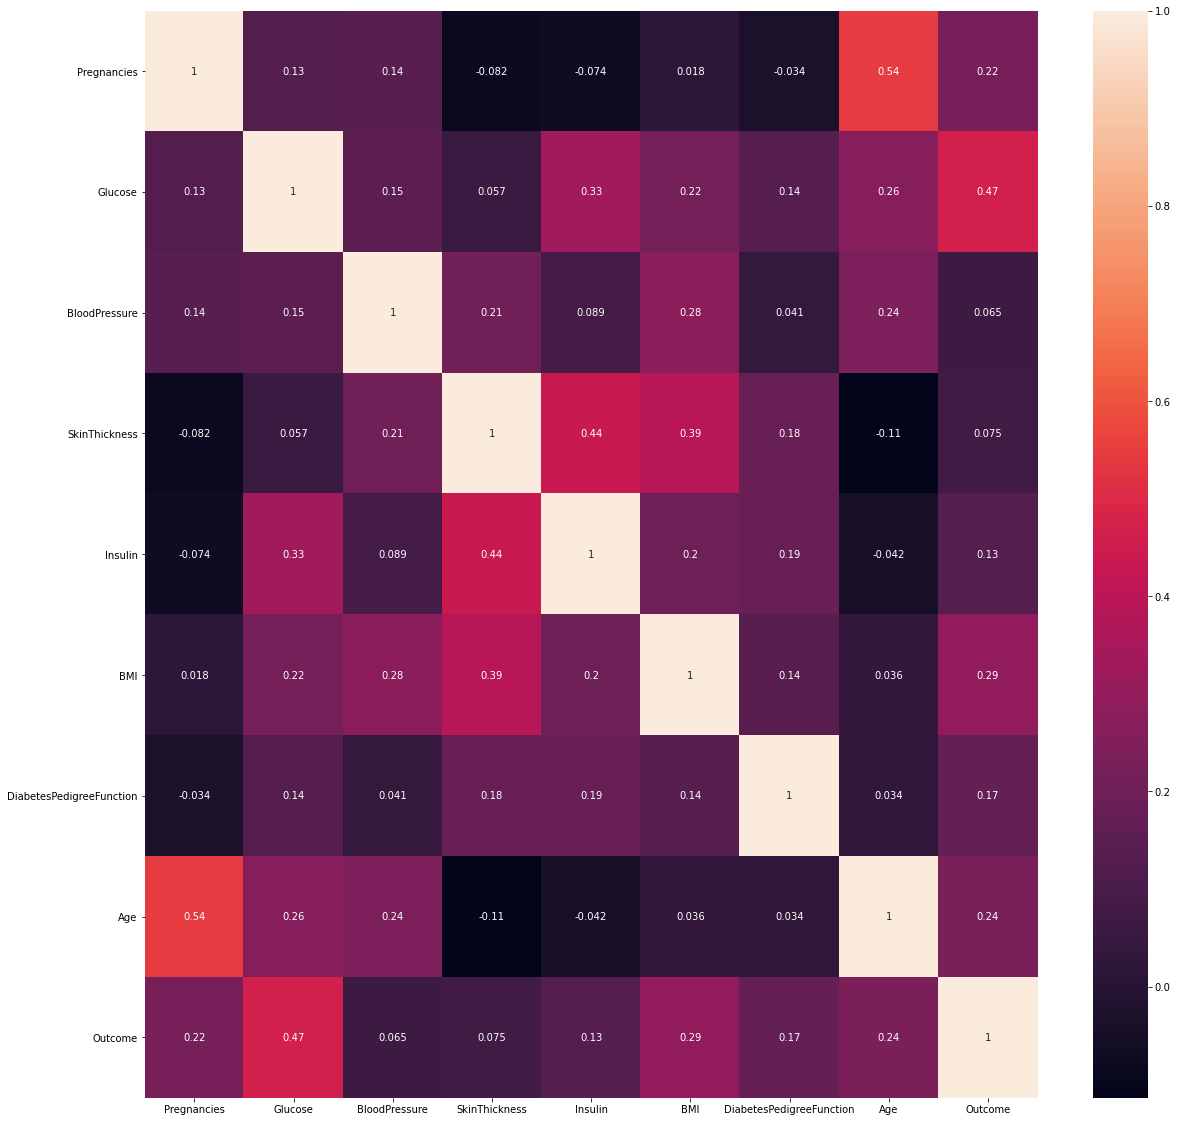

In [63]:
## Correlation
#get correlations of each features in dataset
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

In [64]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


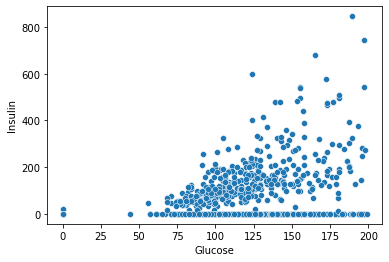

In [65]:
sns.scatterplot(data.Glucose,data.Insulin)

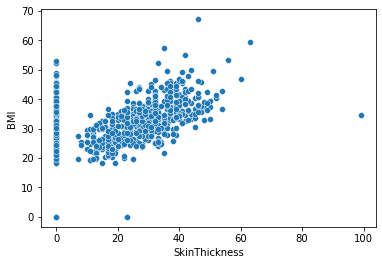

In [66]:
sns.scatterplot(data.SkinThickness,data.BMI)

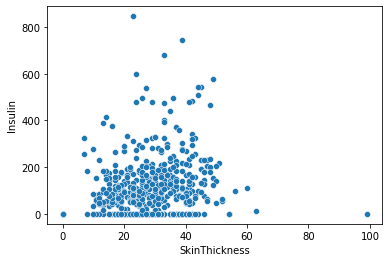

In [67]:
sns.scatterplot(data.SkinThickness,data.Insulin)

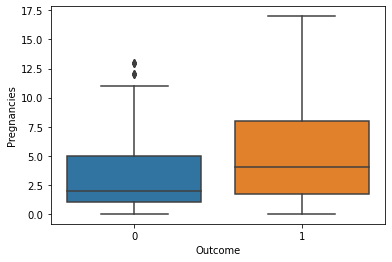

In [68]:
sns.boxplot(x=data.Outcome, y=data.Pregnancies)

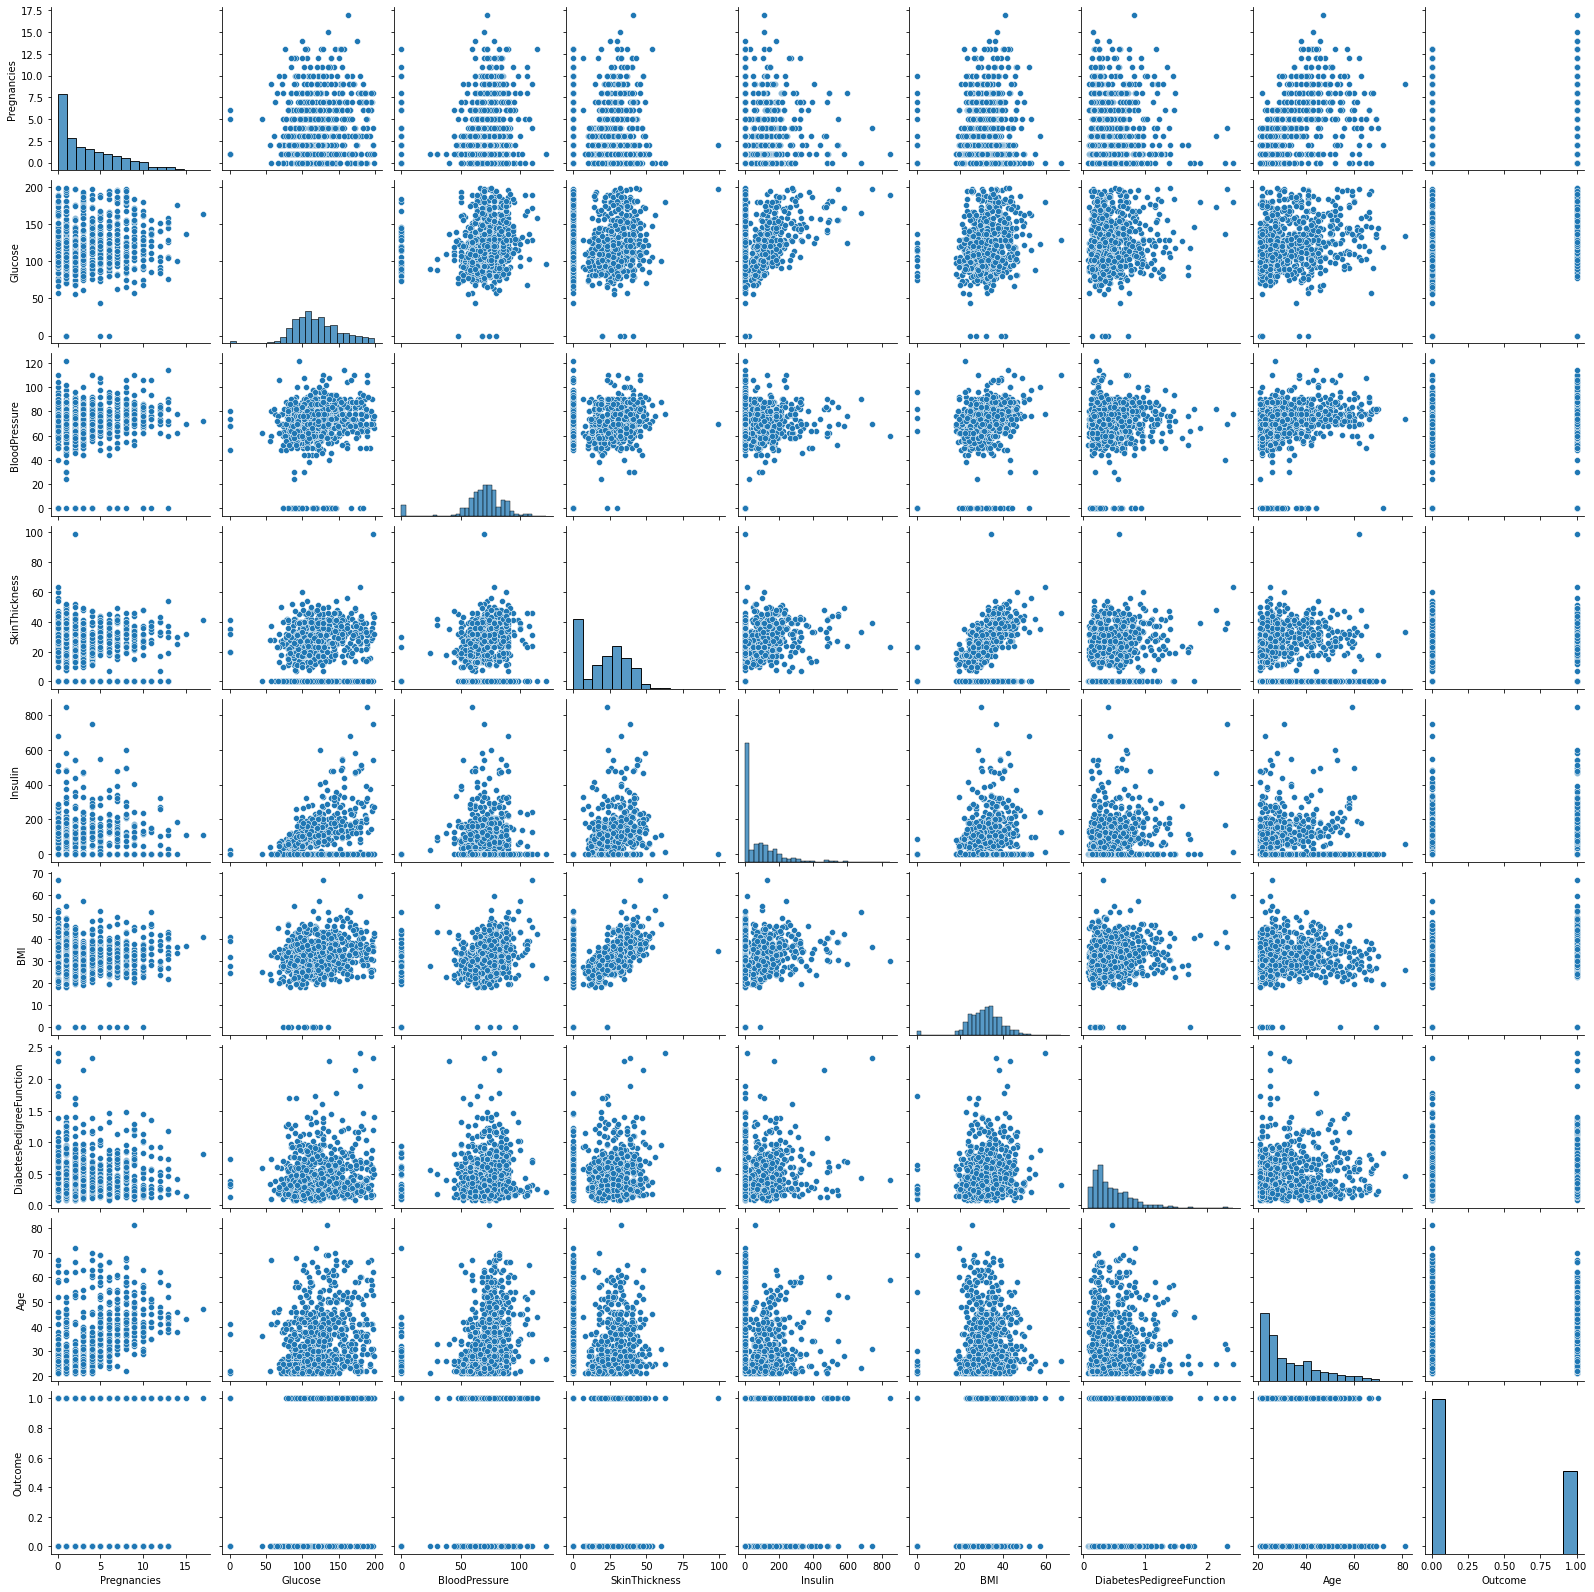

In [69]:
sns.pairplot(data)

In [28]:
diabetes_true_count = len(data.loc[data['Outcome'] == True])
diabetes_false_count = len(data.loc[data['Outcome'] == False])

In [29]:
## Train Test Split
from sklearn.model_selection import train_test_split
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'SkinThickness']
predicted_class = ['Outcome']

In [30]:
X = data[feature_columns].values
y = data[predicted_class].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

## Check how many other missing (zero) values

In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

In [39]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(random_state=12)

decisiontree.fit(X_train,y_train.ravel())
predicted_y=decisiontree.predict(X_test)
from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predicted_y)))

Accuracy = 0.719


In [55]:
## Apply Algorithm

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

model=random_forest_model.fit(X_train, y_train.ravel())

In [56]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.736


In [42]:
## Hyper Parameter Optimization
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [43]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
!pip install xgboost
import xgboost

You should consider upgrading via the 'c:\python\python39\python.exe -m pip install --upgrade pip' command.


In [44]:
classifier=xgboost.XGBClassifier(use_label_encoder =False)

In [45]:
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [46]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [47]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train,y_train.ravel())
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[10:12:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 Time taken: 0 hours 0 minutes and 10.42 seconds.


In [48]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [49]:
classifier=xgboost.XGBClassifier(use_label_encoder =False)

In [51]:
from sklearn.preprocessing import LabelEncoder 
lbl_en = LabelEncoder()
data["Outcome"] = lbl_en.fit_transform(data["Outcome"].values)

In [52]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train,y_train.ravel(),cv=10)

[10:13:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:13:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [53]:
score

array([0.72222222, 0.75925926, 0.75925926, 0.74074074, 0.68518519,
       0.66666667, 0.75925926, 0.66037736, 0.69811321, 0.81132075])

In [54]:
score.mean()

0.726240391334731

In [58]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))